## Alzheime image dataset in google drive
https://drive.google.com/drive/folders/1BM7i7OU4pHrukjwFYiMMQL0WyNlAlK0q?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# set up path
base_path = '/content/gdrive/MyDrive/Colab Notebooks/final project/Alzheimer Dataset (OASIS)'

moderate_demented_path = os.path.join(base_path, 'Moderate_Demented')
mild_demented_path = os.path.join(base_path, 'Mild_Demented')
very_mild_demented_path = os.path.join(base_path, 'Very_Mild_Demented')
# non_demented_path = os.path.join(base_path, 'Non_Demented_sh')

In [ ]:
# (Test) Image paths
image_paths = [os.path.join(moderate_demented_path, filename) for filename in os.listdir(moderate_demented_path) if filename.endswith(".jpg")]

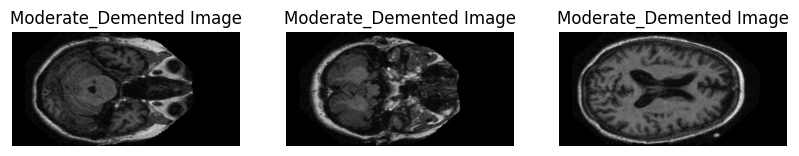

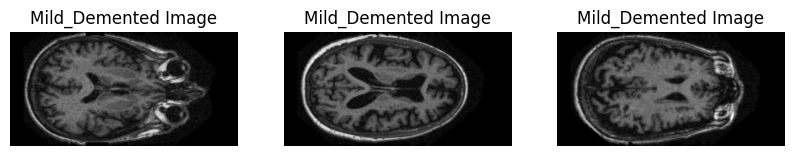

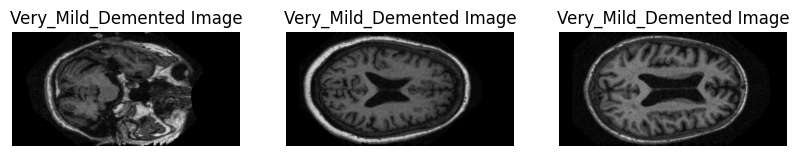

In [ ]:
# Visualize images with titles for different classes
# classes = ["Moderate_Demented", "Mild_Demented", "Very_Mild_Demented", "Non_Demented_sh"]
classes = ["Moderate_Demented", "Mild_Demented", "Very_Mild_Demented"]

for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    image_paths = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith(".jpg")]

    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    for i, img_path in enumerate(image_paths[:3]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"{class_name} Image", fontsize= 12)

    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Function to load and preprocess images
def load_images(image_paths, label):
    images = []
    labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize to a common size
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load images for each class
X_moderate_demented, y_moderate_demented = load_images([os.path.join(moderate_demented_path, filename) for filename in os.listdir(moderate_demented_path) if filename.endswith(".jpg")], 'Moderate_Demented')
X_mild_demented, y_mild_demented = load_images([os.path.join(mild_demented_path, filename) for filename in os.listdir(mild_demented_path) if filename.endswith(".jpg")], 'Mild_Demented')
X_very_mild_demented, y_very_mild_demented = load_images([os.path.join(very_mild_demented_path, filename) for filename in os.listdir(very_mild_demented_path) if filename.endswith(".jpg")], 'Very_Mild_Demented')
# X_non_demented, y_non_demented = load_images([os.path.join(non_demented_path, filename) for filename in os.listdir(non_demented_path) if filename.endswith(".jpg")], 'Non_Demented')

In [ ]:
# Concatenate data from all classes
# X = np.concatenate([X_moderate_demented, X_mild_demented, X_very_mild_demented, X_non_demented])
# y = np.concatenate([y_moderate_demented, y_mild_demented, y_very_mild_demented, y_non_demented])
X = np.concatenate([X_moderate_demented, X_mild_demented, X_very_mild_demented])
y = np.concatenate([y_moderate_demented, y_mild_demented, y_very_mild_demented])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6, shuffle= True,random_state=42, stratify=y)

In [ ]:
# One-hot encode the labels
le = LabelEncoder()
num_classes = 3
# y_train_encoded = to_categorical(le.fit_transform(y_train))
# y_test_encoded = to_categorical(le.transform(y_test))
y_train_encoded = to_categorical(le.fit_transform(y_train), num_classes)
y_test_encoded = to_categorical(le.transform(y_test), num_classes)

In [ ]:
# Check the classes
classes = le.classes_
print("Encoded Classes:", classes)

Encoded Classes: ['Mild_Demented' 'Moderate_Demented' 'Very_Mild_Demented']


In [ ]:
# # (method 1) Build a simple CNN model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(4, activation='softmax')  # 4 classes: Moderate_Demented, Mild_Demented, Very_Mild_Demented, Non_Demented
#     # layers.Dense(3, activation='softmax')  # 3 classes: Moderate_Demented, Mild_Demented, Non_Demented
# ])
# # Check the structure of the model
# model.summary()

In [ ]:
from tensorflow.keras import models, layers

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='Same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='Same'),

    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Assuming 3 classes: Moderate_Demented, Mild_Demented, Very_Mild_Demented
    layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 54, 54, 64)        256       
 Normalization)                                                  
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=30, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/30
481/481 [==============================] - 145s 296ms/step - loss: 0.6126 - accuracy: 0.7457 - val_loss: 0.6554 - val_accuracy: 0.7419
Epoch 2/30
481/481 [==============================] - 141s 294ms/step - loss: 0.5878 - accuracy: 0.7551 - val_loss: 1.3909 - val_accuracy: 0.3112
Epoch 3/30
481/481 [==============================] - 141s 294ms/step - loss: 0.5785 - accuracy: 0.7608 - val_loss: 0.5437 - val_accuracy: 0.8009
Epoch 4/30
481/481 [==============================] - 141s 293ms/step - loss: 0.5565 - accuracy: 0.7719 - val_loss: 0.5602 - val_accuracy: 0.7562
Epoch 5/30
481/481 [==============================] - 141s 294ms/step - loss: 0.5366 - accuracy: 0.7796 - val_loss: 0.6344 - val_accuracy: 0.7700
Epoch 6/30
481/481 [==============================] - 141s 293ms/step - loss: 0.5221 - accuracy: 0.7861 - val_loss: 0.4736 - val_accuracy: 0.7963
Epoch 7/30
481/481 [==============================] - 143s 297ms/step - loss: 0.5196 - accuracy: 0.7902 - val_loss: 0.5753 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

121/121 [==============================] - 2s 13ms/step - loss: 0.4736 - accuracy: 0.7963
Test Accuracy: 79.63%


In [ ]:
# Export our model to HDF5 file
# model.save("/content/drive/MyDrive/Colab Notebooks/Alzheimer(OASIS)ThreeCategories.h5")

In [ ]:
#The accuracy of the past performance stored in Alzheimer(OASIS)ThreeCategories.h5 is as follows.

import pickle
import pandas as pd

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Create a DataFrame for the training history
history_df = pd.DataFrame(history.history)

# Add test metrics to the DataFrame
history_df['test_loss'] = test_loss
history_df['test_accuracy'] = test_acc

# Save the combined training and test metrics to a pickle file
# combined_metrics = {'history': history.history, 'test_loss': test_loss, 'test_accuracy': test_acc}
# with open("Alzheimer(OASIS)CombinedMetrics.pkl", "wb") as file:
#     pickle.dump(combined_metrics, file)

121/121 [==============================] - 2s 13ms/step - loss: 0.3601 - accuracy: 0.8582
Test Accuracy: 85.82%
